In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional

# Title

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/title_seq_data/word_seq_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/title_seq_data/word_seq_test.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/title_seq_data/word_seq_valid.csv')

y_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/train_label.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/test_label.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/valid_label.csv')

vocab_size = int(np.loadtxt('/content/drive/MyDrive/ML_Project/data/fake-news/vocab_size_title.txt'))

In [5]:
print(vocab_size)

22625


In [6]:
X_train.shape, X_test.shape, X_valid.shape

((10942, 30), (3652, 30), (3617, 30))

## LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [10]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=30, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 4)             90500     
                                                                 
 dropout_3 (Dropout)         (None, 30, 4)             0         
                                                                 
 lstm_1 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 100)               500       
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
342/342 [==============================] - 9s 18ms/step - loss: 0.3849 - accuracy: 0.8144 - val_loss: 0.2007 - val_accuracy: 0.9096
Epoch 2/10
342/342 [==============================] - 5s 15ms/step - loss: 0.1492 - accuracy: 0.9435 - val_loss: 0.1958 - val_accuracy: 0.9165
Epoch 3/10
342/342 [==============================] - 5s 16ms/step - loss: 0.0799 - accuracy: 0.9725 - val_loss: 0.1993 - val_accuracy: 0.9281
Epoch 4/10
342/342 [==============================] - 5s 15ms/step - loss: 0.0525 - accuracy: 0.9815 - val_loss: 0.2271 - val_accuracy: 0.9270
Epoch 5/10
342/342 [==============================] - 6s 16ms/step - loss: 0.0345 - accuracy: 0.9880 - val_loss: 0.2822 - val_accuracy: 0.9234
Epoch 6/10
342/342 [==============================] - 5s 16ms/step - loss: 0.0241 - accuracy: 0.9900 - val_loss: 0.3076 - val_accuracy: 0.9157
Epoch 7/10
342/342 [==============================] - 6s 16ms/step - loss: 0.0246 - accuracy: 0.9910 - val_loss: 0.3203 - val_accuracy: 0.9173

In [13]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [14]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2042
           1       0.90      0.93      0.91      1610

    accuracy                           0.92      3652
   macro avg       0.92      0.92      0.92      3652
weighted avg       0.92      0.92      0.92      3652



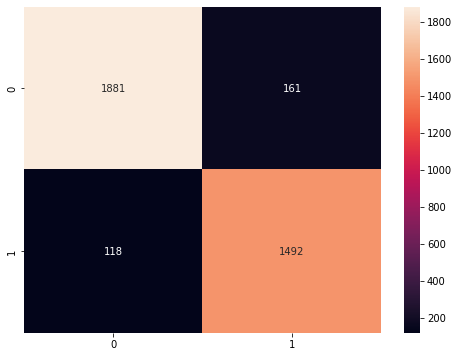

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- Bi-LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [16]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=30, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 4)             90500     
                                                                 
 dropout_6 (Dropout)         (None, 30, 4)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 8)                288       
 l)                                                              
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 100)               900       
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                      

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
342/342 [==============================] - 11s 23ms/step - loss: 0.3957 - accuracy: 0.8150 - val_loss: 0.1967 - val_accuracy: 0.9101
Epoch 2/10
342/342 [==============================] - 7s 20ms/step - loss: 0.1450 - accuracy: 0.9434 - val_loss: 0.1920 - val_accuracy: 0.9187
Epoch 3/10
342/342 [==============================] - 7s 21ms/step - loss: 0.0820 - accuracy: 0.9705 - val_loss: 0.1989 - val_accuracy: 0.9270
Epoch 4/10
342/342 [==============================] - 7s 21ms/step - loss: 0.0503 - accuracy: 0.9829 - val_loss: 0.2115 - val_accuracy: 0.9245
Epoch 5/10
342/342 [==============================] - 7s 21ms/step - loss: 0.0371 - accuracy: 0.9868 - val_loss: 0.2538 - val_accuracy: 0.9165
Epoch 6/10
342/342 [==============================] - 7s 20ms/step - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.2806 - val_accuracy: 0.9265
Epoch 7/10
342/342 [==============================] - 7s 20ms/step - loss: 0.0226 - accuracy: 0.9912 - val_loss: 0.2978 - val_accuracy: 0.919

In [19]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [20]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2042
           1       0.93      0.88      0.90      1610

    accuracy                           0.92      3652
   macro avg       0.92      0.91      0.91      3652
weighted avg       0.92      0.92      0.92      3652



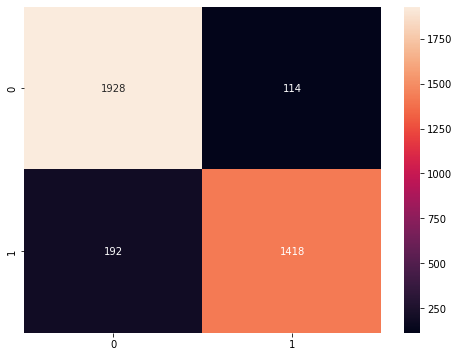

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Text

In [22]:
X_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_test.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_valid.csv')

y_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/train_label.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/test_label.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/valid_label.csv')

vocab_size = int(np.loadtxt('/content/drive/MyDrive/ML_Project/data/fake-news/vocab_size_text.txt'))

In [23]:
print(vocab_size)

193874


In [24]:
X_train.shape, X_test.shape, X_valid.shape

((10942, 1200), (3652, 1200), (3617, 1200))

## LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=1200, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1200, 4)           775496    
                                                                 
 dropout_21 (Dropout)        (None, 1200, 4)           0         
                                                                 
 lstm_8 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_22 (Dropout)        (None, 4)                 0         
                                                                 
 dense_16 (Dense)            (None, 100)               500       
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 2)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
342/342 [==============================] - 189s 544ms/step - loss: 0.4336 - accuracy: 0.7859 - val_loss: 0.2156 - val_accuracy: 0.9254
Epoch 2/10
342/342 [==============================] - 184s 537ms/step - loss: 0.1608 - accuracy: 0.9453 - val_loss: 0.1756 - val_accuracy: 0.9408
Epoch 3/10
342/342 [==============================] - 186s 544ms/step - loss: 0.0669 - accuracy: 0.9804 - val_loss: 0.1808 - val_accuracy: 0.9392
Epoch 4/10
342/342 [==============================] - 185s 540ms/step - loss: 0.0441 - accuracy: 0.9867 - val_loss: 0.2022 - val_accuracy: 0.9411
Epoch 5/10
342/342 [==============================] - 186s 544ms/step - loss: 0.0316 - accuracy: 0.9893 - val_loss: 0.2284 - val_accuracy: 0.9430
Epoch 6/10
342/342 [==============================] - 184s 539ms/step - loss: 0.0229 - accuracy: 0.9904 - val_loss: 0.2314 - val_accuracy: 0.9414
Epoch 7/10
342/342 [==============================] - 184s 538ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.2907 -

In [ ]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2042
           1       0.95      0.95      0.95      1610

    accuracy                           0.96      3652
   macro avg       0.95      0.96      0.95      3652
weighted avg       0.96      0.96      0.96      3652



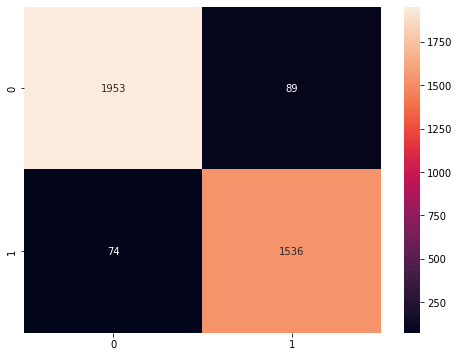

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- Bi-LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [25]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=1200, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1200, 4)           775496    
                                                                 
 dropout_9 (Dropout)         (None, 1200, 4)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 8)                288       
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 100)               900       
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                      

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
342/342 [==============================] - 281s 812ms/step - loss: 0.5286 - accuracy: 0.7154 - val_loss: 0.3711 - val_accuracy: 0.8253
Epoch 2/10
342/342 [==============================] - 275s 805ms/step - loss: 0.2528 - accuracy: 0.9079 - val_loss: 0.1947 - val_accuracy: 0.9284
Epoch 3/10
342/342 [==============================] - 275s 804ms/step - loss: 0.1652 - accuracy: 0.9402 - val_loss: 0.1958 - val_accuracy: 0.9254
Epoch 4/10
342/342 [==============================] - 273s 798ms/step - loss: 0.1889 - accuracy: 0.9271 - val_loss: 0.2693 - val_accuracy: 0.8875
Epoch 5/10
342/342 [==============================] - 275s 804ms/step - loss: 0.0860 - accuracy: 0.9714 - val_loss: 0.2221 - val_accuracy: 0.9212
Epoch 6/10
342/342 [==============================] - 273s 799ms/step - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.2383 - val_accuracy: 0.9267
Epoch 7/10
342/342 [==============================] - 272s 796ms/step - loss: 0.0308 - accuracy: 0.9911 - val_loss: 0.2693 -

In [28]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [29]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2042
           1       0.95      0.87      0.91      1610

    accuracy                           0.92      3652
   macro avg       0.93      0.92      0.92      3652
weighted avg       0.92      0.92      0.92      3652



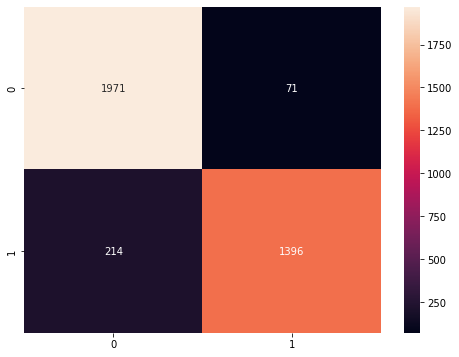

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()